In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv('/home/sasidharreddy/stuff/OELP_sem6/additional_features/data.csv')
df  =  df1
df.to_csv('new.csv', index=False)
df['datetime'] = pd.to_datetime( df['idates'].astype(str)+ '-' + df['imonths'].astype(str)+'-'+df['iyears'].astype(str))
df = df.drop(['idates', 'imonths', 'iyears'], axis=1)
df.to_csv('output_file.csv', index=False)

df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,pvar21,pvar22,pvar23,pvar24,pvar25,pvar26,pvar27,pvar28,pvar29,pvar30
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,287.904816,18.886101,15.760518,-1.342469,0.032635,-0.071185,0.044942,24.187777,3.949473,0.571053
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,286.894318,26.235052,16.276497,0.356517,0.068687,0.065599,-0.046934,10.856130,-3.764291,0.242903
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,286.598755,24.448057,9.800149,0.370943,0.010355,0.113501,-0.034104,0.199471,-6.309412,-0.131587
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,287.291229,25.766298,8.085279,0.204268,0.057326,0.100468,0.003991,-3.734798,-2.256974,-0.494028
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,288.210236,33.293129,12.673347,0.749107,0.062085,0.056777,-0.038684,-1.539389,-0.943537,-0.272203


In [4]:
df1

,idates,imonths,iyears,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,...,pvar22,pvar23,pvar24,pvar25,pvar26,pvar27,pvar28,pvar29,pvar30,datetime
0,2007,1,6,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,...,18.886101,15.760518,-1.342469,0.032635,-0.071185,0.044942,24.187777,3.949473,0.571053,2007-01-06
1,2007,1,7,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,...,26.235052,16.276497,0.356517,0.068687,0.065599,-0.046934,10.856130,-3.764291,0.242903,2007-01-07
2,2007,1,8,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,...,24.448057,9.800149,0.370943,0.010355,0.113501,-0.034104,0.199471,-6.309412,-0.131587,2007-01-08
3,2007,1,9,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,...,25.766298,8.085279,0.204268,0.057326,0.100468,0.003991,-3.734798,-2.256974,-0.494028,2007-01-09
4,2007,1,10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,...,33.293129,12.673347,0.749107,0.062085,0.056777,-0.038684,-1.539389,-0.943537,-0.272203,2007-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2020,12,27,0.0,0.0,0.0,292.349579,0.0,-0.134501,-0.330605,...,22.601984,10.075965,2.845399,0.002192,0.037210,0.033872,5.044056,2.544335,-2.367390,2020-12-27
4994,2020,12,28,0.0,0.0,0.0,292.926605,0.0,-0.558952,-0.205444,...,24.928835,15.007801,1.083511,-0.024991,0.016587,0.048118,10.108992,4.334765,-2.106347,2020-12-28
4995,2020,12,29,0.0,0.0,0.0,294.176666,0.0,-1.051628,0.059863,...,22.123894,13.816175,-1.325656,0.015454,-0.000724,-0.059172,19.665627,3.174320,-1.200928,2020-12-29
4996,2020,12,30,0.0,0.0,0.0,294.178894,0.0,-1.039607,-0.103797,...,25.638474,10.111415,-0.586587,0.018174,0.060805,-0.065860,18.872049,5.432332,-1.850764,2020-12-30


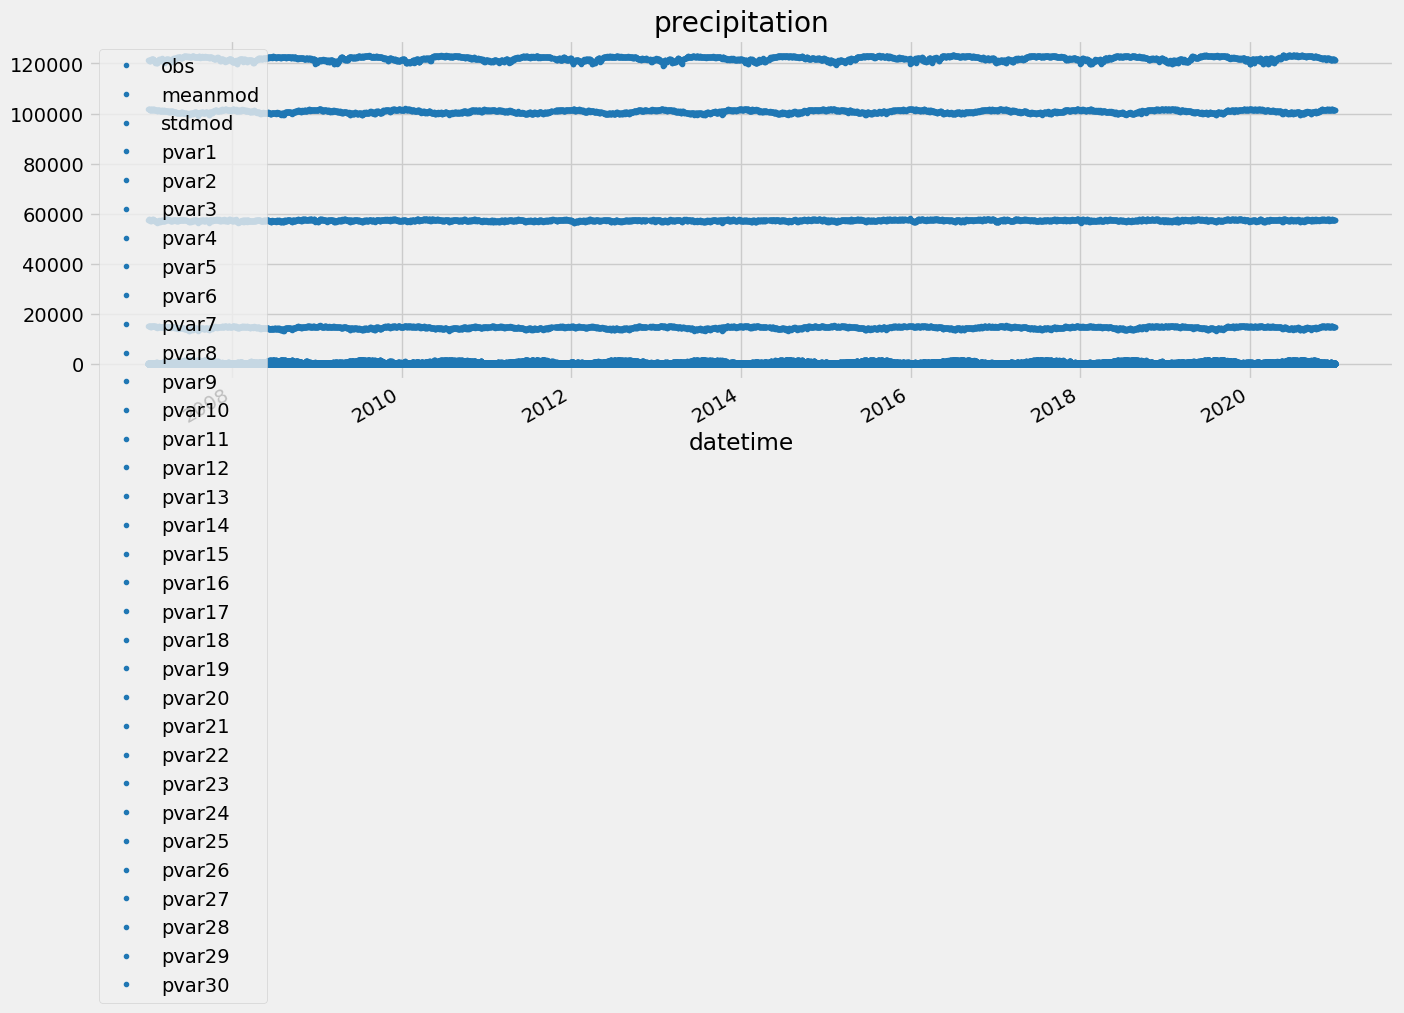

In [5]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='precipitation')
plt.show()

<AxesSubplot:ylabel='Frequency'>

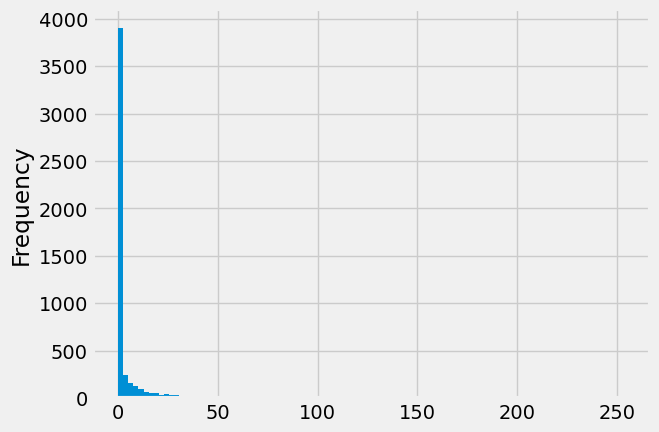

In [6]:
df['obs'].plot(kind='hist', bins=100)

In [43]:
# df.query('obs>130').plot(figsize=(15,5),style=".")

In [44]:
# df = df.query('obs<130').copy()

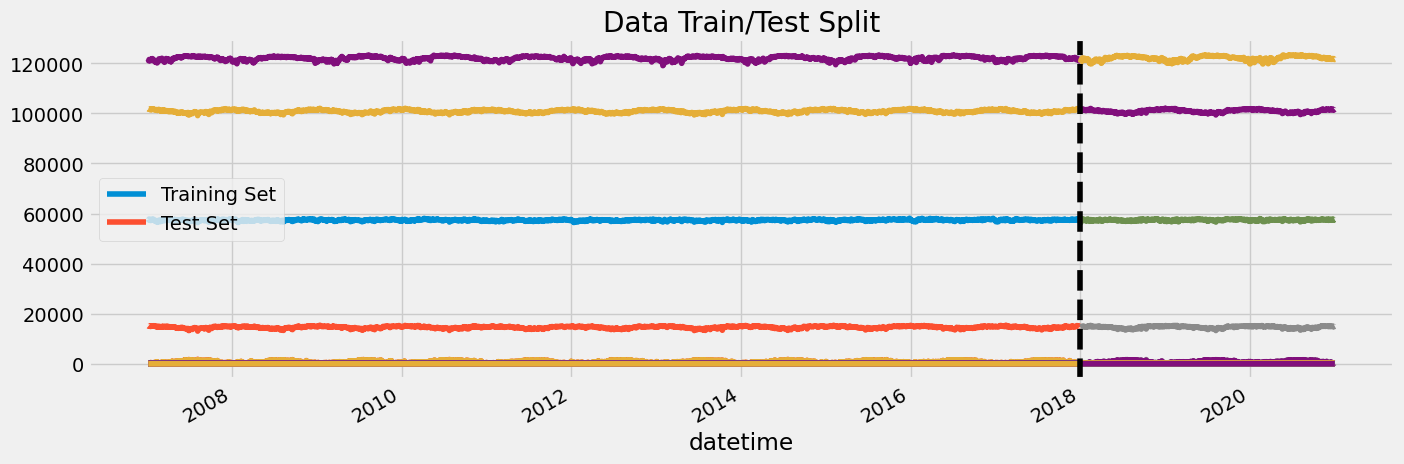

In [7]:
train = df.loc[df.index < '01-01-2018']
test = df.loc[df.index >= '01-01-2018']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [8]:
from sklearn.model_selection import TimeSeriesSplit
#test size 1 day*365 days*1 year
tss = TimeSeriesSplit(n_splits=5, test_size=1*365*1, gap=1)
df = df.sort_index()

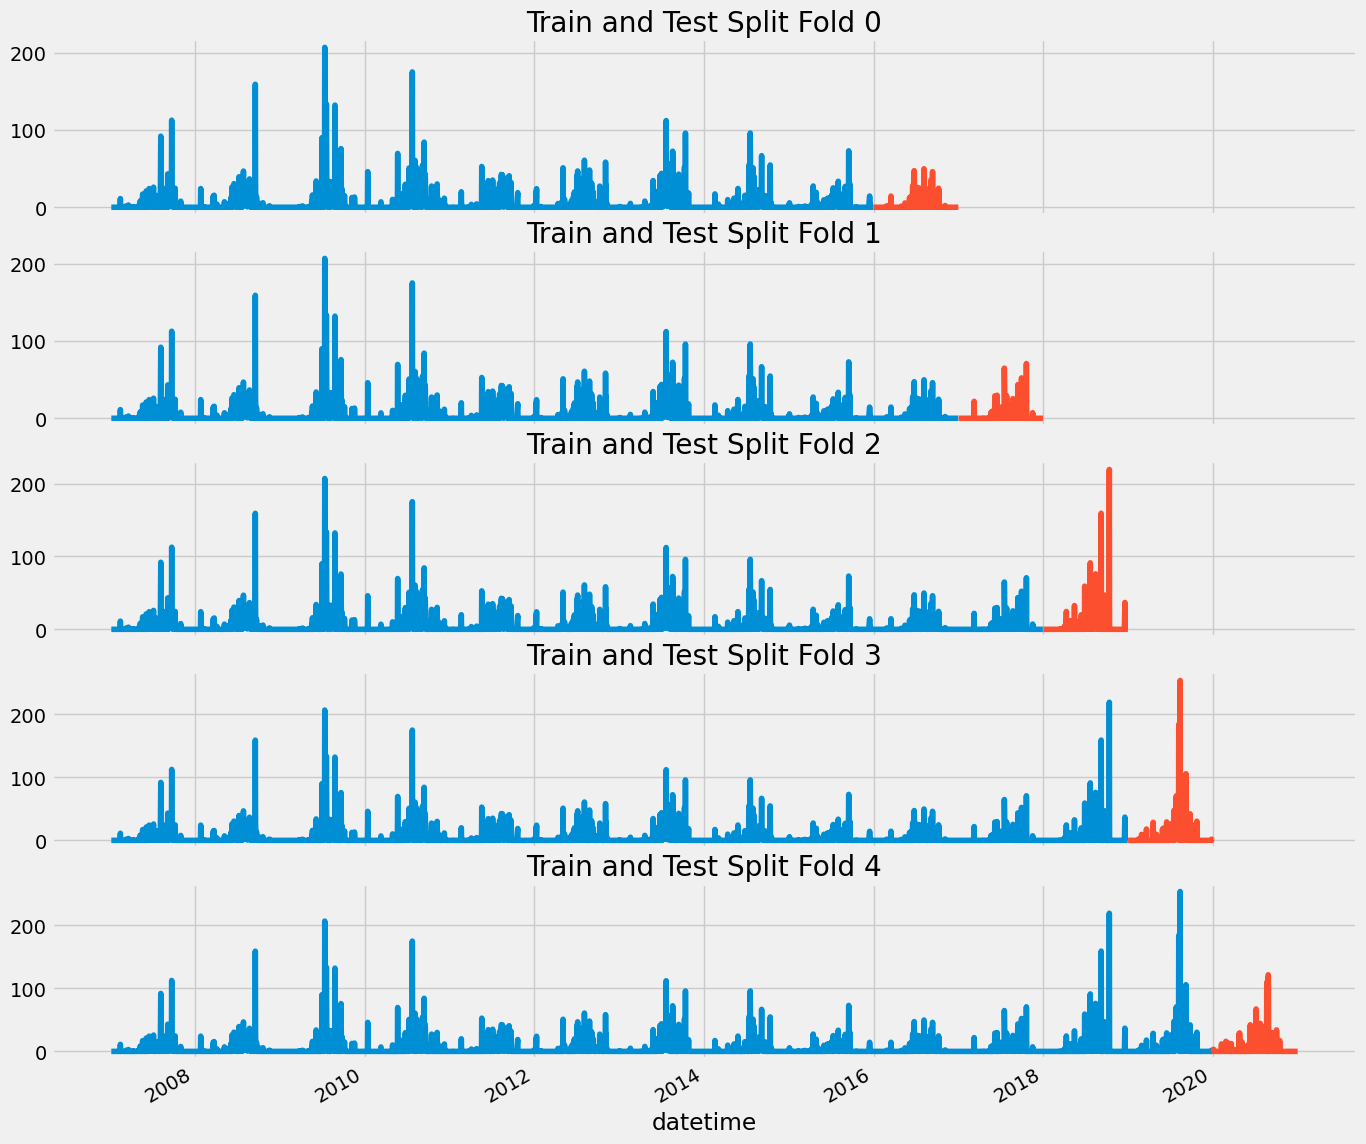

In [9]:
#time series cross validation
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['obs'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Train and Test Split Fold {fold}')
    test['obs'].plot(ax=axs[fold],
                         label='Test Set')
    #axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [10]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [11]:
df1['meanmod']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4993    0.0
4994    0.0
4995    0.0
4996    0.0
4997    0.0
Name: meanmod, Length: 4998, dtype: float64

In [12]:
df['dayofmonth']

datetime
2007-01-06     6
2007-01-07     7
2007-01-08     8
2007-01-09     9
2007-01-10    10
              ..
2020-12-27    27
2020-12-28    28
2020-12-29    29
2020-12-30    30
2020-12-31    31
Name: dayofmonth, Length: 4998, dtype: int64

In [13]:
def add_lags(df):
    target_map = df['obs'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [14]:
df = add_lags(df)

In [15]:
df.head()

,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
datetime,,,,,,,,,,,,,,,,,,,,,
2007-01-06,0.0,0.0,0.0,291.720795,0.0,-0.782454,-0.490873,0.0,4.150000e-08,-8.050000e-06,...,5,1,1,2007,6,6,1,NaN,NaN,NaN
2007-01-07,0.0,0.0,0.0,291.902191,0.0,-0.712374,-0.414769,0.0,-2.720000e-05,-3.050000e-06,...,6,1,1,2007,7,7,1,NaN,NaN,NaN
2007-01-08,0.0,0.0,0.0,291.922394,0.0,-0.667299,0.080287,0.0,-7.300000e-06,1.560000e-05,...,0,1,1,2007,8,8,2,NaN,NaN,NaN
2007-01-09,0.0,0.0,0.0,292.204071,0.0,-0.481174,-0.055403,0.0,-4.310000e-05,1.630000e-07,...,1,1,1,2007,9,9,2,NaN,NaN,NaN
2007-01-10,0.0,0.0,0.0,292.935821,0.0,-0.396369,-0.392895,0.0,6.410000e-06,-1.220000e-05,...,2,1,1,2007,10,10,2,NaN,NaN,NaN


In [ ]:
# for only some features, 

In [16]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  
import numpy as np
import pandas as pd

# Assume df is already loaded and sorted by date
df = df.sort_index()

# Create features function - Assuming a function that extracts time features and lag features
def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12  # Interaction term

    # Rolling window features
    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    # Expanded lag features to capture more temporal dynamics
    for lag in [1, 2, 3, 7, 14, 21, 28]:  # Including weekly and monthly lags
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)  # Ensure no NA values
    return data

df = create_advanced_features(df)


# Feature and target definition
FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28'
]
TARGET = 'obs'
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])
# TimeSeriesSplit setup
tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)

# Placeholder for predictions and scores
scores = []

# Grid Search to optimize RandomForest parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Running the model training and validation within the TimeSeries split loop
for train_idx, val_idx in tss.split(df):
    X_train, X_test = df.iloc[train_idx][FEATURES], df.iloc[val_idx][FEATURES]
    y_train, y_test = df.iloc[train_idx][TARGET], df.iloc[val_idx][TARGET]
    
    # Handling missing, infinite values, and ensuring all data is float
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_train.fillna(method='ffill', inplace=True)
    X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_test.fillna(method='ffill', inplace=True)

    # Random Forest model with grid search
    best_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=2, random_state=0)
    best_model.fit(X_train, y_train)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Predictions and scoring
    y_pred = best_model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

# Print the best score and parameters
print("Best RMSE per fold:", scores)
print("Average RMSE:", np.mean(scores))
print("Best parameters:", grid_search.best_params_)




NameError: name 'model' is not defined

In [1]:
# For all features and their importances



In [55]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler  

# Assume df is already loaded and sorted by date
df = df.sort_index()

# Create features function - Assuming a function that extracts time features and lag features
def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12  # Interaction term

    # Rolling window features
    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    # Expanded lag features to capture more temporal dynamics
    for lag in [1, 2, 3, 7, 14, 21, 28]:  # Including weekly and monthly lags
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)  # Ensure no NA values
    return data

df = create_advanced_features(df)


#Feature and target definition
FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28','meanmod','stdmod'
]

for i in range(1, 31):
    FEATURES.append('pvar{}'.format(i))
TARGET = 'obs'
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])

# TimeSeriesSplit setup
tss = TimeSeriesSplit(n_splits=5, test_size=365, gap=1)

# Placeholder for predictions and scores
scores = []

feature_importances = np.zeros(len(FEATURES))

# Grid Search to optimize RandomForest parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

# Running the model training and validation within the TimeSeries split loop
for train_idx, val_idx in tss.split(df):
    X_train, X_test = df.iloc[train_idx][FEATURES], df.iloc[val_idx][FEATURES]
    y_train, y_test = df.iloc[train_idx][TARGET], df.iloc[val_idx][TARGET]
    
    # Handling missing, infinite values, and ensuring all data is float
    X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_train.fillna(method='ffill', inplace=True)
    X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
    X_test.fillna(method='ffill', inplace=True)

    # Random Forest model with grid search
    best_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=2, random_state=0)
    best_model.fit(X_train, y_train)
#     grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
    
    # Store feature importances
    feature_importances += best_model.feature_importances_
    
    # Predictions and scoring
    y_pred = best_model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

# Average feature importances over all folds
feature_importances /= tss.n_splits

# Print the best score and parameters
print("Best RMSE per fold:", scores)
print("Average RMSE:", np.mean(scores))
# print("Best parameters:", grid_search.best_params_)


# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': FEATURES, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Best RMSE per fold: [7.0462158756119955, 7.922038700248055, 15.792370814943894, 15.824886728838925, 10.68116788583327]
Average RMSE: 11.453336001095227
           Feature  Importance
18           pvar2    0.110750
8             lag1    0.080983
30          pvar14    0.079511
33          pvar17    0.075784
19           pvar3    0.058304
27          pvar11    0.052130
34          pvar18    0.049991
43          pvar27    0.048367
17           pvar1    0.036076
7    rolling_std_7    0.023513
23           pvar7    0.022410
15         meanmod    0.022258
26          pvar10    0.021263
20           pvar4    0.017623
21           pvar5    0.015756
0        dayofyear    0.015124
25           pvar9    0.014576
38          pvar22    0.014178
28          pvar12    0.014126
22           pvar6    0.013451
45          pvar29    0.012578
42          pvar26    0.012324
46          pvar30    0.011587
32          pvar16    0.011101
24           pvar8    0.011007
6   rolling_mean_7    0.009932
31         

In [56]:
# Check for NaNs or infinite values after preprocessing
print("NaNs in X_train:", X_train.isna().sum().sum())
print("NaNs in y_train:", y_train.isna().sum())
print("NaNs in X_test:", X_test.isna().sum().sum())
print("NaNs in y_test:", y_test.isna().sum())

print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())
print("Infinite values in y_test:", np.isinf(y_test).sum())



NaNs in X_train: 0
NaNs in y_train: 0
NaNs in X_test: 0
NaNs in y_test: 0
Infinite values in X_train: 0
Infinite values in y_train: 0
Infinite values in X_test: 0
Infinite values in y_test: 0


In [57]:
scores

[7.0462158756119955,
 7.922038700248055,
 15.792370814943894,
 15.824886728838925,
 10.68116788583327]

In [58]:
print(f'mean square error across folds {np.mean(scores):0.4f}')
print(f'Fold mean square error:{scores}')

mean square error across folds 11.4533
Fold mean square error:[7.0462158756119955, 7.922038700248055, 15.792370814943894, 15.824886728838925, 10.68116788583327]


In [ ]:
# for some features

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12  # Interaction term

    # Rolling window features
    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    # Expanded lag features to capture more temporal dynamics
    for lag in [1, 2, 3, 7, 14, 21, 28]:  # Including weekly and monthly lags
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)  # Ensure no NA values
    return data

df = create_advanced_features(df)

FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28'
]
TARGET = 'obs'


# Example of adding cyclic features
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)

# Scaling features
scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])
X_all = df[FEATURES]
y_all = df[TARGET]
# Re-running the model with simplified parameters
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=2, random_state=0)
model.fit(X_all, y_all)
y_pred_all = model.predict(X_all)
rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))
print(f"RMSE: {rmse}")


In [ ]:
#for all features

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
def create_advanced_features(data):
    data['dayofyear'] = data.index.dayofyear
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['month_year'] = data['month'] + data['year'] * 12  # Interaction term

    # Rolling window features
    data['rolling_mean_7'] = data['obs'].shift(1).rolling(window=7).mean()
    data['rolling_std_7'] = data['obs'].shift(1).rolling(window=7).std()

    # Expanded lag features to capture more temporal dynamics
    for lag in [1, 2, 3, 7, 14, 21, 28]:  # Including weekly and monthly lags
        data[f'lag{lag}'] = data['obs'].shift(lag)

    data.dropna(inplace=True)  # Ensure no NA values
    return data

df = create_advanced_features(df)

FEATURES = [
    'dayofyear', 'dayofweek', 'quarter', 'month', 'year', 'month_year',
    'rolling_mean_7', 'rolling_std_7', 'lag1', 'lag2', 'lag3', 'lag7', 'lag14', 'lag21', 'lag28','meanmod','stdmod'
]
for i in range(1, 31):
    FEATURES.append('pvar{}'.format(i))
TARGET = 'obs'


# Example of adding cyclic features
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)

# Scaling features
scaler = StandardScaler()
df[FEATURES] = scaler.fit_transform(df[FEATURES])
X_all = df[FEATURES]
y_all = df[TARGET]
# Re-running the model with simplified parameters
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_leaf=2, random_state=0)
model.fit(X_all, y_all)
y_pred_all = model.predict(X_all)
rmse = np.sqrt(mean_squared_error(y_all, y_pred_all))
print(f"RMSE: {rmse}")


RMSE: 6.086235984360524


In [60]:
df.index.max()

Timestamp('2020-12-31 00:00:00')

In [61]:
df


,obs,meanmod,stdmod,pvar1,pvar2,pvar3,pvar4,pvar5,pvar6,pvar7,...,lag3,month_year,rolling_mean_7,rolling_std_7,lag7,lag14,lag21,lag28,sin_month,cos_month
datetime,,,,,,,,,,,,,,,,,,,,,
2007-03-31,0.0,-0.426389,-0.452528,1.260297,-0.363584,-0.018881,0.969506,-0.477378,0.167650,0.608780,...,-0.310451,-1.739001,-0.555718,-0.543637,-0.310451,-0.310520,-0.180292,-0.31055,1.000000e+00,6.123234e-17
2007-04-01,0.0,-0.426389,-0.452528,1.410290,-0.363584,0.284394,0.024067,-0.477378,0.178308,-0.078798,...,-0.310451,-1.718132,-0.555718,-0.543637,-0.310451,-0.310520,-0.310550,-0.31055,8.660254e-01,-5.000000e-01
2007-04-02,0.0,-0.424790,-0.448290,1.334291,-0.363584,0.195965,0.051995,-0.477378,0.322857,2.360139,...,-0.310451,-1.718132,-0.555718,-0.543637,-0.310451,-0.310520,-0.302220,-0.31055,8.660254e-01,-5.000000e-01
2007-04-03,0.0,-0.383212,-0.394615,1.480475,-0.363443,0.600430,0.293729,-0.476929,0.029630,0.143710,...,-0.310451,-1.718132,-0.555718,-0.543637,-0.310451,-0.310520,-0.310550,-0.31055,8.660254e-01,-5.000000e-01
2007-04-04,0.0,-0.426389,-0.452528,1.428637,-0.362353,-0.163068,-0.171461,-0.474262,-0.135436,0.414280,...,-0.310451,-1.718132,-0.555718,-0.543637,-0.310451,-0.085598,-0.310550,-0.31055,8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.0,-0.426389,-0.452528,-1.744608,-0.363584,-0.456952,-0.845116,-0.477378,-1.866022,-0.403482,...,-0.310451,1.704313,-0.555718,-0.543637,-0.310451,-0.310520,-0.310550,-0.31055,-2.449294e-16,1.000000e+00
2020-12-28,0.0,-0.426389,-0.452528,-1.597616,-0.363584,-0.804480,-0.723575,-0.477378,0.596633,0.231018,...,-0.310451,1.704313,-0.555718,-0.543637,-0.310451,-0.310520,-0.310550,-0.31055,-2.449294e-16,1.000000e+00
2020-12-29,0.0,-0.426389,-0.452528,-1.279173,-0.363584,-1.207869,-0.465941,-0.477378,0.494716,-0.756174,...,-0.310451,1.704313,-0.555718,-0.543637,-0.310451,-0.310520,-0.310550,-0.31055,-2.449294e-16,1.000000e+00


In [62]:
# Add predicted values as a new column to the DataFrame
df['predicted_data'] = y_pred_all

In [63]:
# Replace negative predicted values with zero
df['predicted_data'] =df['predicted_data'].clip(lower=0)
df['predicted_data'] = df['predicted_data'].clip(lower=0).round(2)

In [64]:
from sklearn.metrics import r2_score

# Calculate bias
bias = np.mean(y_pred_all - y_all)

# Calculate standard deviation
std = np.std(y_pred_all - y_all)

# Calculate mean
mean = np.mean(y_pred_all)

# Calculate R-squared
r2 = r2_score(y_all, y_pred_all)

print("Bias:", bias)
print("Standard Deviation:", std)
print("Mean:", mean)
print("R-squared:", r2)


Bias: 0.022990222182624157
Standard Deviation: 6.086192562432501
Mean: 4.12242245661486
R-squared: 0.7875596493602689


In [65]:
from sklearn.metrics import mean_squared_error, r2_score

rmse_meanmod = np.sqrt(mean_squared_error(df['obs'], df['meanmod']))
r2_meanmod = r2_score(df['obs'], df['meanmod'])
bias_meanmod = np.mean(df['meanmod'] - df['obs'])
mean_meanmod = np.mean(df['meanmod'])

print("RMSE for meanmod:", rmse_meanmod)
print("R-squared for meanmod:", r2_meanmod)
print("Bias for meanmod:", bias_meanmod)
print("Mean for meanmod:", mean_meanmod)

mean_obs=np.mean(df['obs'])
print('obs mean',mean_obs)


RMSE for meanmod: 13.401819901763545
R-squared for meanmod: -0.030070594614991064
Bias for meanmod: -4.099432234432213
Mean for meanmod: -1.763614352914931e-16
obs mean 4.09943223443224


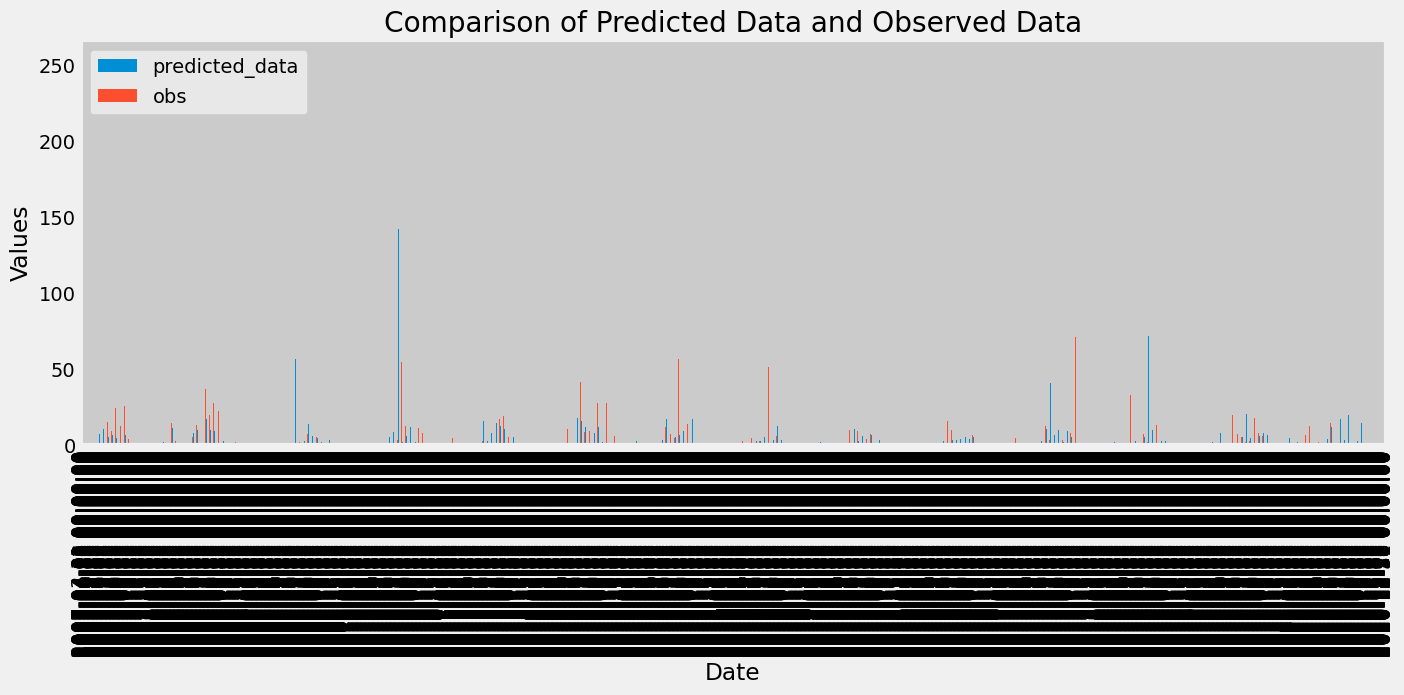

In [76]:
import matplotlib.pyplot as plt
df_sample = df[['predicted_data', 'obs']]
#.sample(30, random_state=0)

df_sample.plot(kind='bar', figsize=(15, 5), width=0.4)
plt.title('Comparison of Predicted Data and Observed Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()
